In [1]:
#importing necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

C:\ProgramData\Anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.QVLO2T66WEPI7JZ63PS3HMOHFEY472BC.gfortran-win_amd64.dll
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
Train1 = pd.read_csv('X_train_80_20_KNN_RFE.csv')

In [3]:
Train2 = pd.read_csv('y_train_80_20_KNN_RFE.csv')

In [4]:
Test1 = pd.read_csv('X_test_80_20_KNN_RFE.csv')

In [5]:
Test2 = pd.read_csv('y_test_80_20_KNN_RFE.csv')

In [6]:
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import roc_auc_score

def confusion_matrix_and_metrics(model, y_test, preds, X_test):
    cm = confusion_matrix(y_test, preds)
    plt.figure(figsize=(8, 6))
    plt.title('Confusion Matrix', size=16)
    sns.heatmap(cm, annot=True, cmap="YlGnBu", fmt="d",xticklabels=['Act. pass', 'Act. fail'], yticklabels=['Pred. pass', 'Pred. fail']);
    print(classification_report(y_test, preds))


    print('Average Accuracy:', accuracy_score(y_test, preds))
    print('Average Balanced Accuracy:', balanced_accuracy_score(y_test, preds))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

         0.0       0.95      0.79      0.86       295
         1.0       0.10      0.37      0.16        19

    accuracy                           0.76       314
   macro avg       0.53      0.58      0.51       314
weighted avg       0.90      0.76      0.82       314

Average Accuracy: 0.7643312101910829
Average Balanced Accuracy: 0.5791257805530776


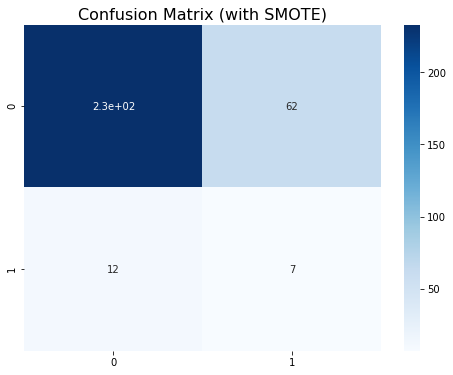

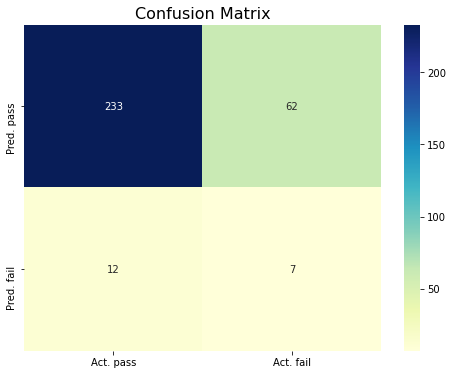

Accuracy = 0.76
Recall = 0.37



In [7]:
#Naive
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(Train1, Train2)
y_pred  =  classifier.predict(Test1)
cm = confusion_matrix(Test2, y_pred)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix (with SMOTE)', size=16)
sns.heatmap(cm, annot=True, cmap='Blues');

confusion_matrix_and_metrics(cm,Test2, y_pred, Test1)
plt.show()

print(f'Accuracy = {accuracy_score(Test2, y_pred):.2f}\nRecall = {recall_score(Test2, y_pred):.2f}\n')